In [362]:
print("hello")

hello


In [363]:
import pandas as pd 
import numpy as np

data = pd.read_csv("survey_results_public.csv") 

col=['Hobbyist','Country','Student','YearsCode','Age1stCode','YearsCodePro','WorkLoc','Age','Gender','WorkWeekHrs','OpSys']
data=data[col] #reducing from 85 to 13 favoured colunmns
original=data
data.dtypes
data.describe()
data.head()

#analysing values
data['Hobbyist'].unique()
data['Country'].unique()
data['Student'].unique()
data['YearsCode'].unique()
data['Age1stCode'].unique()
data['YearsCodePro'].unique()
data['Age'].unique()
data['Gender'].unique()
data['WorkLoc'].unique()
data['WorkWeekHrs'].unique()





#checking for nans
data['Hobbyist'].isna().sum() #no null value
data['Country'].isna().sum() #132
data['Student'].isna().sum() # 1869
data['YearsCode'].isna().sum() #945
data['Age1stCode'].isna().sum()#1249
data['YearsCodePro'].isna().sum()#14552
data['Age'].isna().sum()#9673
data['Gender'].isna().sum() #3477
data['WorkLoc'].isna().sum()#18828
data['WorkWeekHrs'].isna().sum()#24380





#filling nans 
#will use multiple logistic regression to predict values of country later .
data.Student=data.Student.fillna(method='ffill')

data.YearsCode = data.YearsCode[data.YearsCode != 'Less than 1 year']
data.YearsCode = data.YearsCode[data.YearsCode != 'More than 50 years']
(data.YearsCode)=pd.to_numeric(data.YearsCode)
data.YearsCode=data.YearsCode.fillna(data.YearsCode.mean())
#using mean to fill nans


data.Age1stCode = data.Age1stCode[data.Age1stCode != 'Younger than 5 years']
data.Age1stCode = data.Age1stCode[data.Age1stCode != 'Older than 85']
(data.Age1stCode)=pd.to_numeric(data.Age1stCode)
data.Age1stCode=data.Age1stCode.fillna(data.Age1stCode.median())
#using median to fill nans
#using mode to fill nans
data.YearsCodePro=data.YearsCodePro.fillna(data.YearsCodePro.mode())

data.YearsCodePro=data.YearsCodePro.fillna(method='ffill')
#using "ffill " method to fill nans for categorical data


data.Gender.dropna(inplace=True) 
data.Gender.fillna(data.Gender.mode()[0],inplace=True)


data.OpSys.dropna(inplace=True) 
data.OpSys.fillna(data.OpSys.mode()[0],inplace=True)

data['WorkLoc']=data['WorkLoc'].fillna(data['WorkLoc'].mode()[0])
data.Age=data.Age.fillna(data.Age.mean())
data.WorkWeekHrs=data.WorkWeekHrs.fillna(data.WorkWeekHrs.median())


data.Country.dropna(inplace=True) 
data.Country.fillna(data.Country.mode()[0],inplace=True)








In [364]:

data


,Hobbyist,Country,Student,YearsCode,Age1stCode,YearsCodePro,WorkLoc,Age,Gender,WorkWeekHrs,OpSys
0,Yes,United Kingdom,No,4.000000,10.0,2,Office,14.000000,Man,40.0,Windows
1,No,Bosnia and Herzegovina,"Yes, full-time",11.789195,17.0,2,Office,19.000000,Man,40.0,Windows
2,Yes,Thailand,No,3.000000,22.0,1,Home,28.000000,Man,40.0,Linux-based
3,No,United States,No,3.000000,16.0,Less than 1 year,Home,22.000000,Man,80.0,Windows
4,Yes,Ukraine,No,16.000000,14.0,9,Office,30.000000,Man,55.0,Linux-based
...,...,...,...,...,...,...,...,...,...,...,...
88878,Yes,Canada,No,11.789195,15.0,38,Office,30.336699,Man,40.0,Windows
88879,No,NaN,No,11.789195,15.0,38,Office,30.336699,NaN,40.0,NaN
88880,No,NaN,No,11.789195,15.0,38,Office,30.336699,NaN,40.0,NaN
88881,No,NaN,No,11.789195,15.0,38,Office,30.336699,NaN,40.0,NaN


In [365]:

data['Hobbyist'].unique()


array(['Yes', 'No'], dtype=object)

In [366]:


data['Country'].unique()



array(['United Kingdom', 'Bosnia and Herzegovina', 'Thailand',
       'United States', 'Ukraine', 'Canada', 'India', 'New Zealand',
       'Antigua and Barbuda', 'Germany', 'Australia',
       'Russian Federation', 'Brazil', 'Lithuania', 'Israel',
       'South Africa', 'Colombia', 'Turkey', 'Switzerland', 'Argentina',
       'Sri Lanka', 'Czech Republic', 'Denmark', 'Malaysia', 'Bangladesh',
       'Spain', 'Serbia', 'Poland', 'Sweden', 'China', 'France',
       'Netherlands', 'Italy', 'Philippines', 'Ireland', 'Pakistan',
       'Azerbaijan', 'Austria', 'Estonia', 'Croatia', 'South Korea',
       'Greece', 'Japan', 'Romania', 'Finland', 'Bulgaria', 'Viet Nam',
       'Slovenia', 'Iran', 'Belarus', 'Hungary', 'Latvia',
       'Hong Kong (S.A.R.)', 'United Arab Emirates', 'Portugal',
       'Nigeria', 'Norway', 'Nicaragua', 'Zimbabwe', 'Egypt', 'Mexico',
       'Dominican Republic', 'Guatemala', 'Chile', 'Ecuador', 'Ghana',
       'Uganda', 'Cambodia', 'Mauritius', 'Nepal', 'Singapore'

In [367]:
data['Student'].unique()


array(['No', 'Yes, full-time', 'Yes, part-time'], dtype=object)

In [368]:
data['YearsCode'].unique()


array([ 4.        , 11.78919544,  3.        , 16.        , 13.        ,
        6.        ,  8.        , 12.        ,  2.        ,  5.        ,
       17.        , 10.        , 14.        , 35.        ,  7.        ,
       30.        ,  9.        , 26.        , 40.        , 19.        ,
       15.        , 20.        , 28.        , 25.        ,  1.        ,
       22.        , 11.        , 33.        , 50.        , 41.        ,
       18.        , 34.        , 24.        , 23.        , 42.        ,
       27.        , 21.        , 36.        , 32.        , 39.        ,
       38.        , 31.        , 37.        , 29.        , 44.        ,
       45.        , 48.        , 46.        , 43.        , 47.        ,
       49.        ])

In [369]:

data['Age1stCode'].unique()


array([10., 17., 22., 16., 14., 15., 11., 20., 13., 18., 12., 19., 21.,
        8., 35.,  6.,  9., 29.,  7.,  5., 23., 30., 27., 24., 33., 25.,
       26., 39., 36., 38., 28., 31., 32., 37., 50., 65., 42., 34., 40.,
       67., 43., 44., 60., 46., 45., 49., 51., 41., 55., 83., 48., 53.,
       54., 47., 56., 79., 61., 68., 77., 66., 52., 80., 62., 84., 57.,
       58., 63.])

In [370]:
data['YearsCodePro'].unique()


array(['2', '1', 'Less than 1 year', '9', '3', '4', '10', '8', '13', '18',
       '5', '14', '22', '23', '19', '35', '20', '25', '7', '15', '27',
       '6', '48', '12', '31', '11', '17', '16', '21', '29', '30', '26',
       '33', '28', '37', '40', '34', '24', '39', '38', '36', '32', '41',
       '45', '43', 'More than 50 years', '44', '42', '46', '49', '50',
       '47'], dtype=object)

In [371]:

data['Age'].unique()


array([14.        , 19.        , 28.        , 22.        , 30.        ,
       42.        , 24.        , 23.        , 30.33669865, 21.        ,
       31.        , 20.        , 26.        , 29.        , 38.        ,
       47.        , 34.        , 32.        , 25.        , 17.        ,
       35.        , 27.        , 44.        , 43.        , 62.        ,
       37.        , 45.        , 18.        , 33.        , 36.        ,
       16.        , 39.        , 64.        , 41.        , 54.        ,
       49.        , 40.        , 56.        , 12.        , 58.        ,
       46.        , 59.        , 51.        , 48.        , 57.        ,
       52.        , 50.        , 23.9       , 55.        , 15.        ,
       67.        , 13.        ,  1.        , 53.        , 69.        ,
       65.        , 17.5       , 63.        , 61.        , 68.        ,
       73.        , 70.        , 60.        , 16.5       , 46.5       ,
       11.        , 71.        ,  3.        , 97.        , 29.5 

In [372]:
data['Gender'].unique()


array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [373]:

data['WorkLoc'].unique()


array(['Office', 'Home', 'Other place, such as a coworking space or cafe'],
      dtype=object)

In [374]:
data['WorkWeekHrs'].unique()

array([4.000000e+01, 8.000000e+01, 5.500000e+01, 1.500000e+01,
       3.200000e+01, 7.000000e+01, 4.500000e+01, 8.000000e+00,
       1.400000e+02, 5.000000e+01, 3.600000e+01, 3.700000e+01,
       3.500000e+01, 3.800000e+01, 3.900000e+01, 4.200000e+01,
       7.000000e+00, 4.600000e+01, 4.800000e+01, 2.500000e+01,
       4.400000e+01, 6.000000e+00, 1.200000e+01, 7.500000e+01,
       3.000000e+01, 1.600000e+02, 6.000000e+01, 3.850000e+02,
       3.750000e+01, 3.400000e+01, 9.800000e+01, 3.100000e+01,
       9.000000e+00, 4.300000e+01, 1.100000e+01, 2.800000e+01,
       5.400000e+01, 1.000000e+01, 2.000000e+01, 2.400000e+01,
       1.000000e+02, 3.750000e+02, 2.100000e+01, 4.100000e+01,
       1.000000e+00, 3.850000e+01, 4.250000e+01, 3.675000e+01,
       1.600000e+01, 5.200000e+01, 1.300000e+02, 8.500000e+00,
       1.800000e+01, 1.680000e+02, 1.400000e+01, 3.300000e+01,
       3.620000e+01, 4.700000e+01, 1.300000e+01, 4.900000e+01,
       9.000000e+01, 4.000000e+00, 6.500000e+01, 4.7500

In [375]:
#to find Population mean for age
avg_age=data['Age'].mean()
print(avg_age)
avg_WorkWeekHrs=data['WorkWeekHrs'].mean()
print(avg_WorkWeekHrs)
data.describe()

30.33669864915956
41.54372168474286


,YearsCode,Age1stCode,Age,WorkWeekHrs
count,88883.000000,88883.000000,88883.000000,88883.000000
mean,11.789195,15.447228,30.336699,41.543722
std,8.864615,4.943026,8.664567,31.778837
min,1.000000,5.000000,1.000000,1.000000
25%,5.000000,12.000000,25.000000,40.000000
50%,10.000000,15.000000,30.000000,40.000000
75%,15.000000,18.000000,34.000000,40.000000
max,50.000000,84.000000,99.000000,4850.000000


In [376]:
data=data.sample(10000)
data
"""
reduced 85 x 85000 population sample to 11 x 10000 using Simple random sampling method
""" 

'\nreduced 85 x 85000 population sample to 11 x 10000 using Simple random sampling method\n'

In [377]:
import matplotlib.pyplot as plt

'\n'

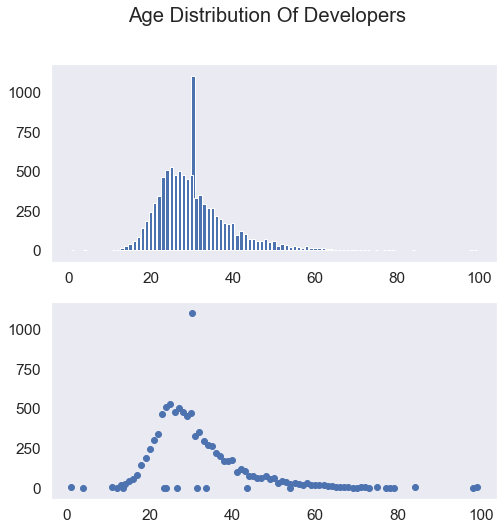

In [378]:
count3=dict(data_numeric['Age'].value_counts())
names=count3.keys()
values=count3.values()
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
#axs[2].plot(names, values)
fig.suptitle('Age Distribution Of Developers')
"""
"""

In [379]:
data.describe()

,YearsCode,Age1stCode,Age,WorkWeekHrs
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.714371,15.467000,30.272221,41.468868
std,8.847616,4.930004,8.695697,18.775219
min,1.000000,5.000000,2.000000,1.000000
25%,5.000000,12.000000,25.000000,40.000000
50%,9.000000,15.000000,30.000000,40.000000
75%,15.000000,18.000000,34.000000,40.000000
max,49.000000,79.000000,99.000000,415.000000


In [380]:
data['Hobbyist'].value_counts()

Yes    8027
No     1973
Name: Hobbyist, dtype: int64

In [381]:
count1=dict(data['Hobbyist'].value_counts())

In [382]:
count1

{'Yes': 8027, 'No': 1973}

In [383]:
print(data.shape)

(10000, 11)


Text(0.5, 0.98, 'Categorical Plotting')

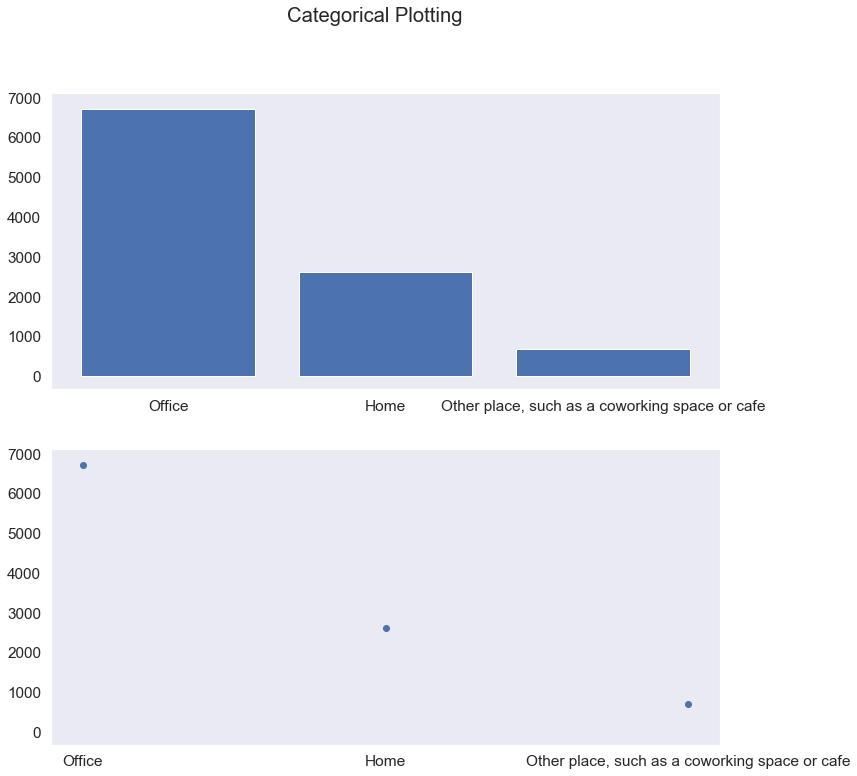

In [384]:
count2=dict(data['WorkLoc'].value_counts())
names=count2.keys()
values=count2.values()
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
#axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [385]:

#We can observe that most people prefer working in an environment that simulates an office culture rather than the casual
#setting offered by homes and cafes

Text(0, 0.5, 'State')

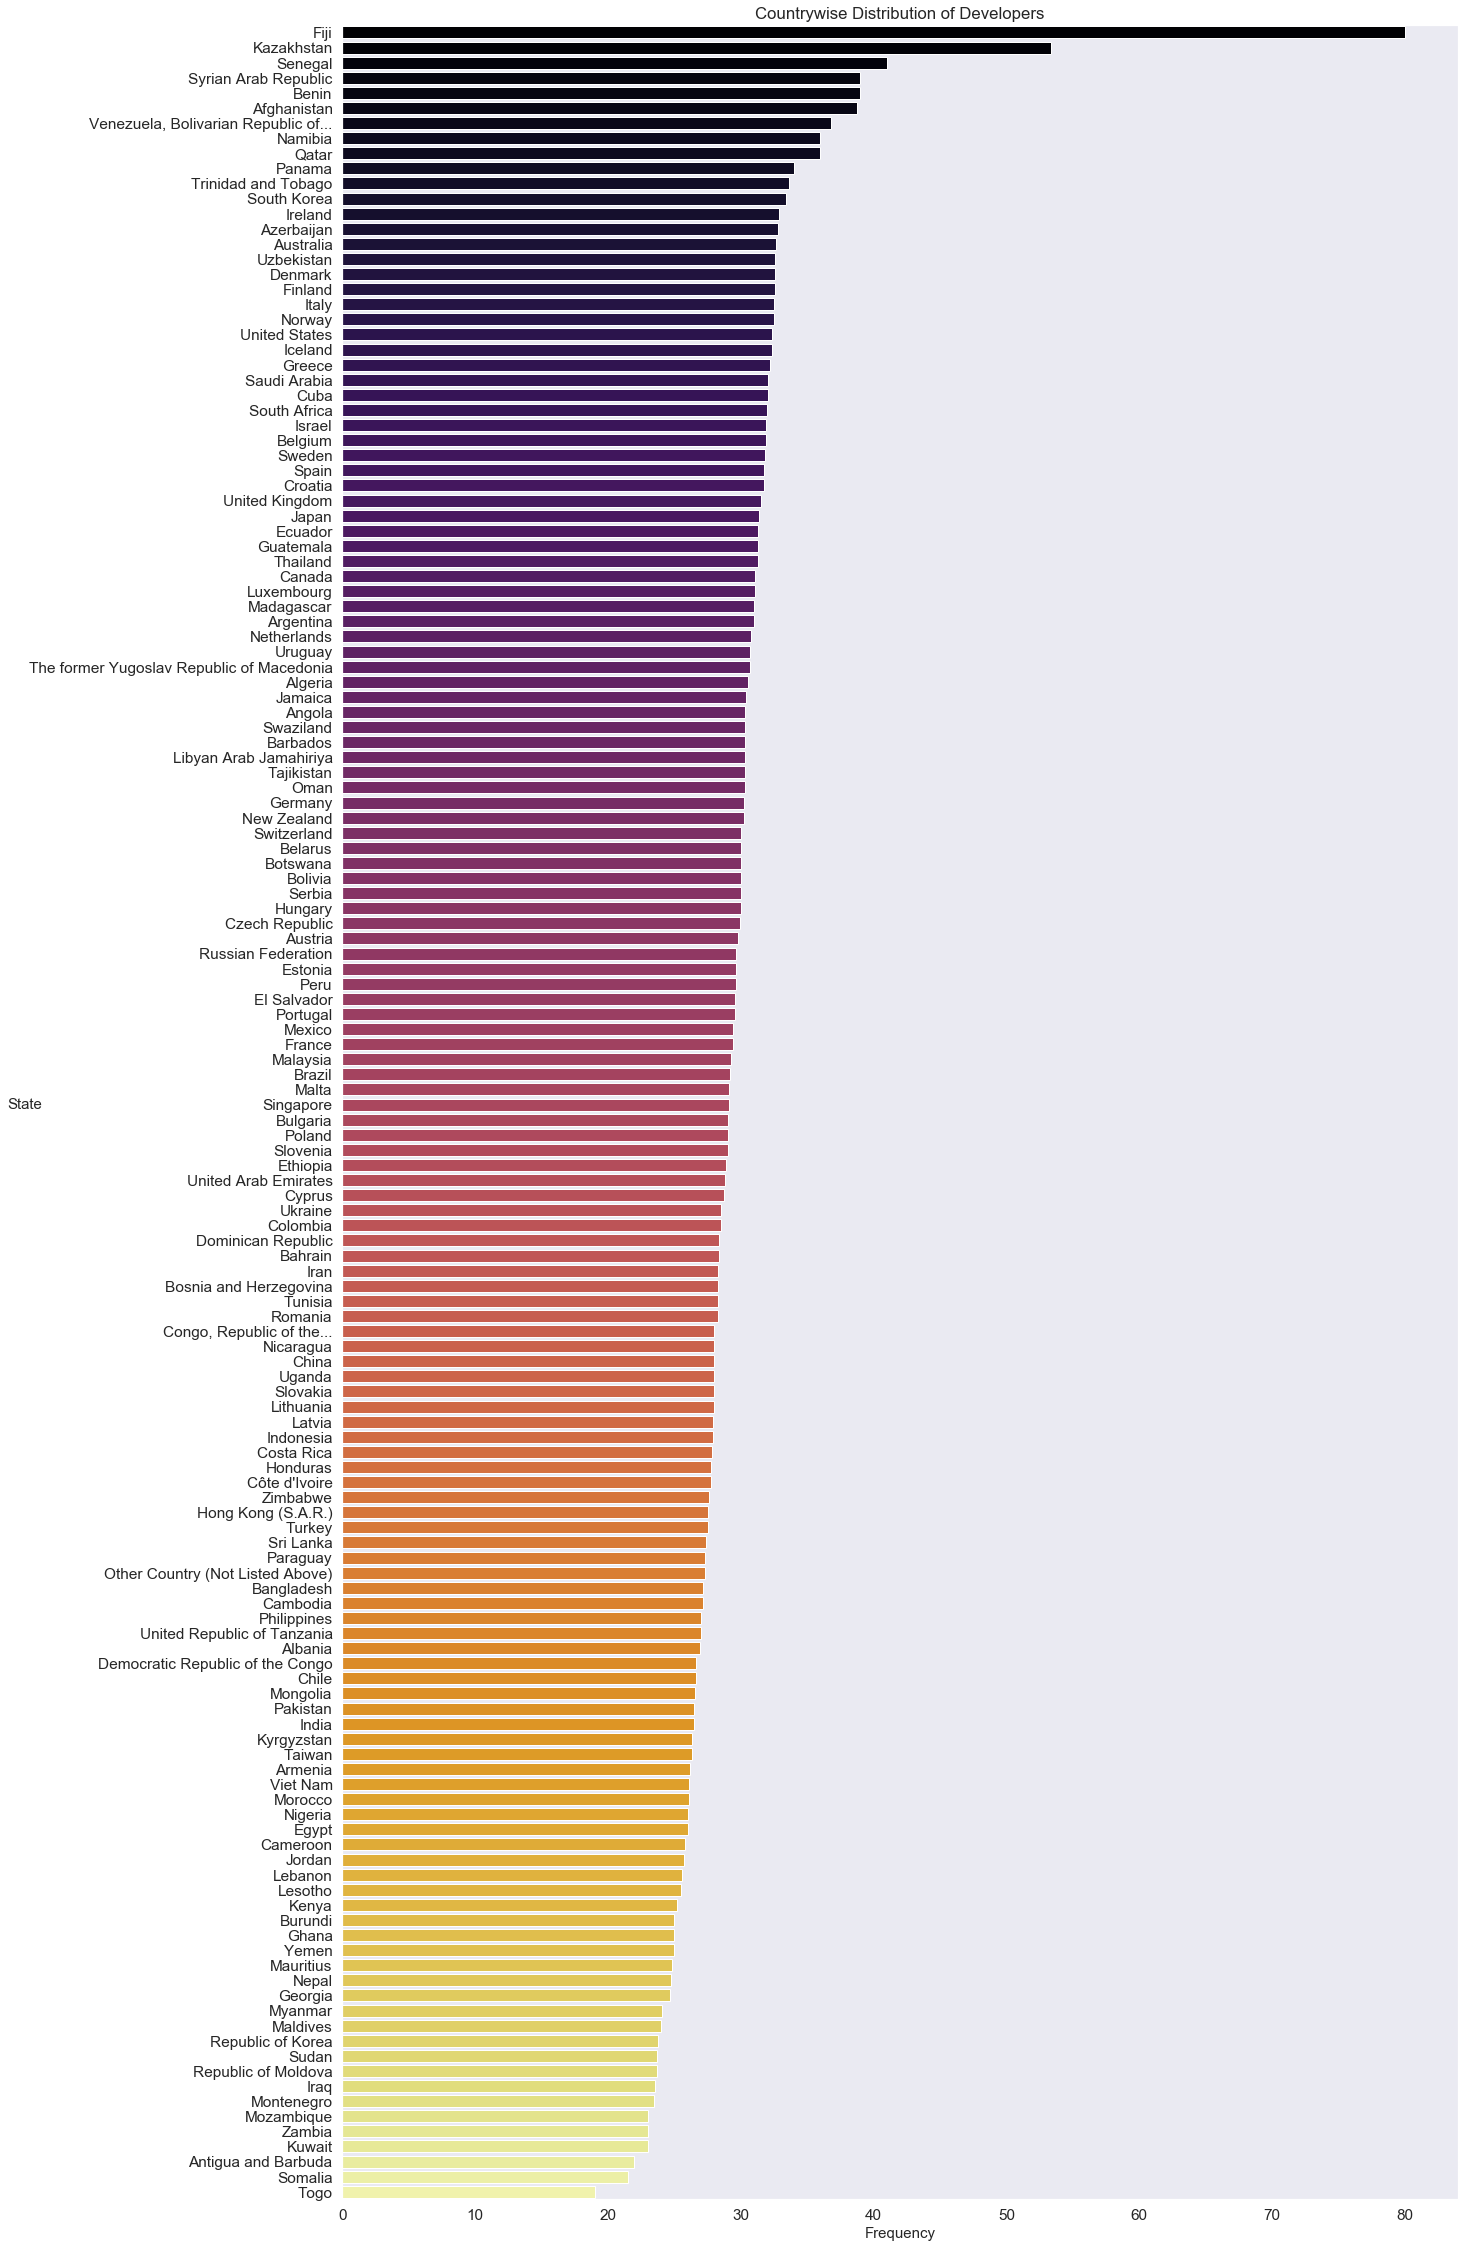

In [386]:
plt.figure(figsize = (20,40))
no2_level  = data.groupby(['Country']).mean()['Age'].sort_values(ascending = False).to_frame()
sns.barplot(x = 'Age', y = no2_level.index,data = no2_level,palette='inferno')
plt.title('Countrywise Distribution of Developers')
plt.xlabel('Frequency',fontsize = 15)
plt.ylabel('State',fontsize = 15,rotation = 'horizontal')

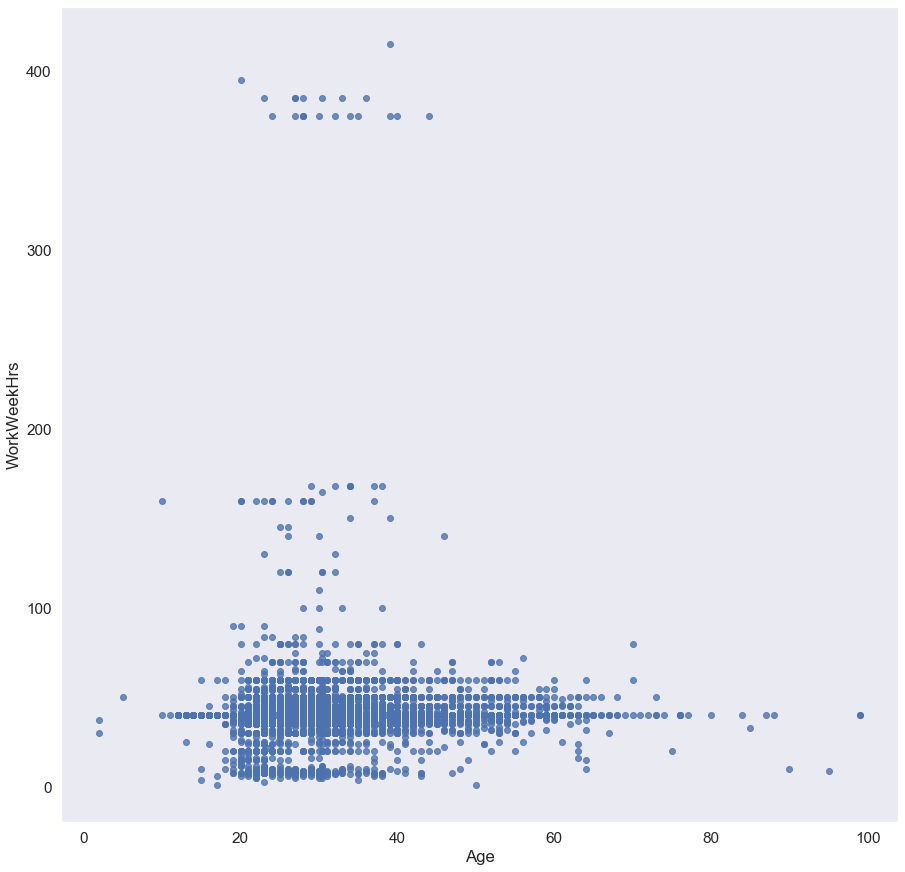

In [387]:
plt.figure(figsize=(15, 15))
sns.regplot(x=data["Age"], y=data["WorkWeekHrs"], fit_reg=False)


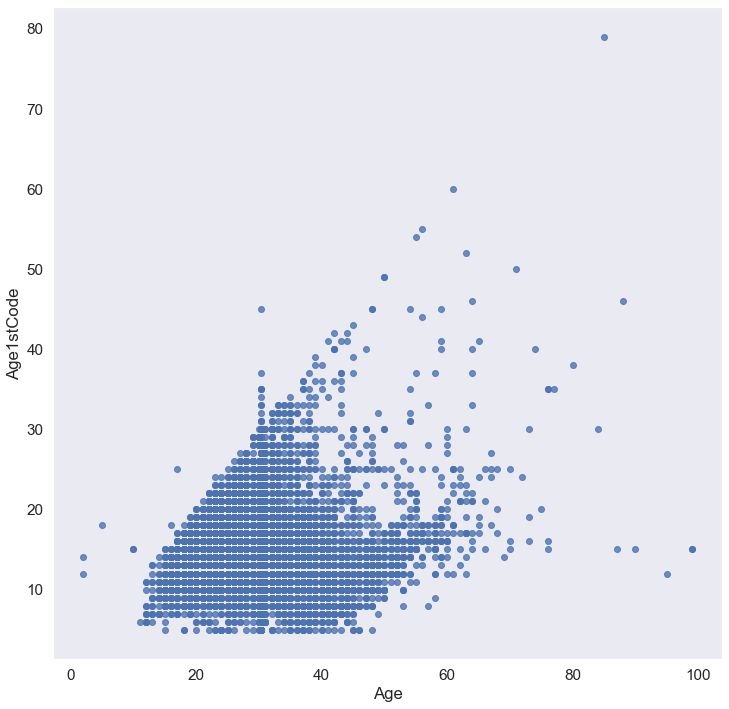

In [388]:
plt.figure(figsize=(12, 12))
sns.regplot(x=data["Age"], y=data["Age1stCode"], fit_reg=False)

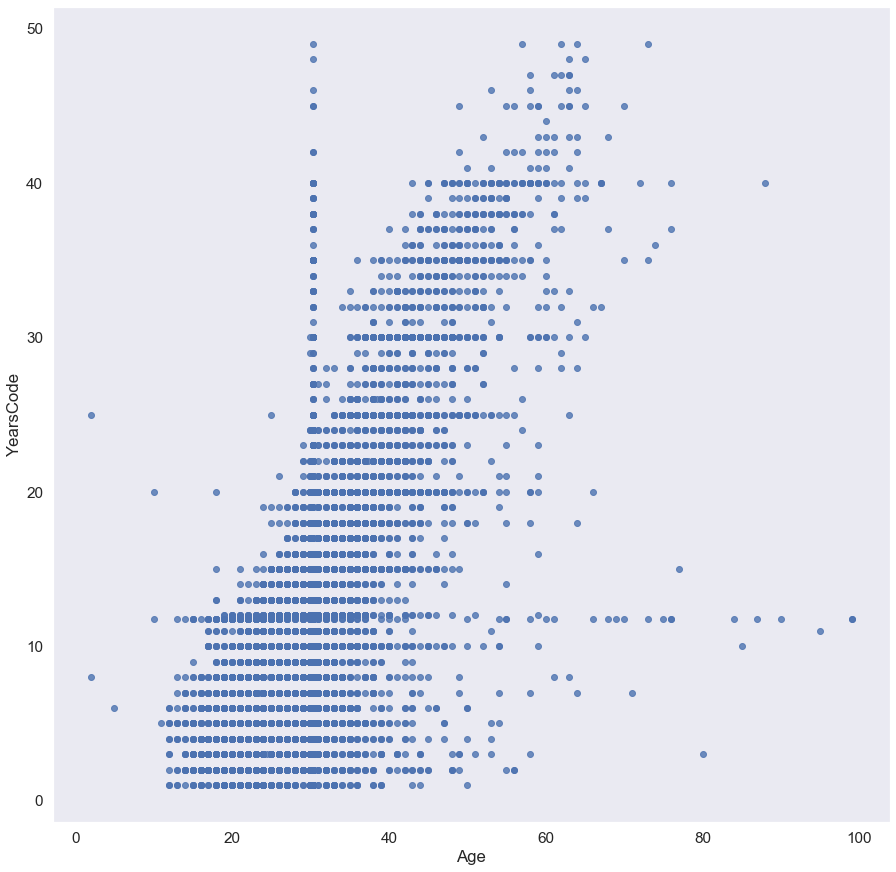

In [389]:
plt.figure(figsize=(15, 15))
sns.regplot(x=data["Age"], y=data["YearsCode"], fit_reg=False)

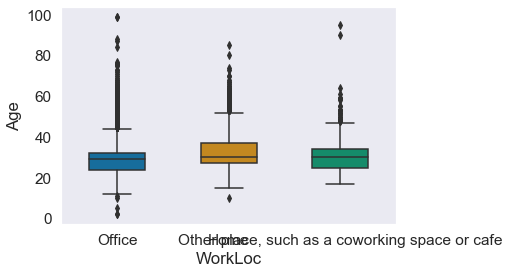

In [390]:
sns.boxplot(x='WorkLoc', y='Age', data=data, width=0.5, palette="colorblind")

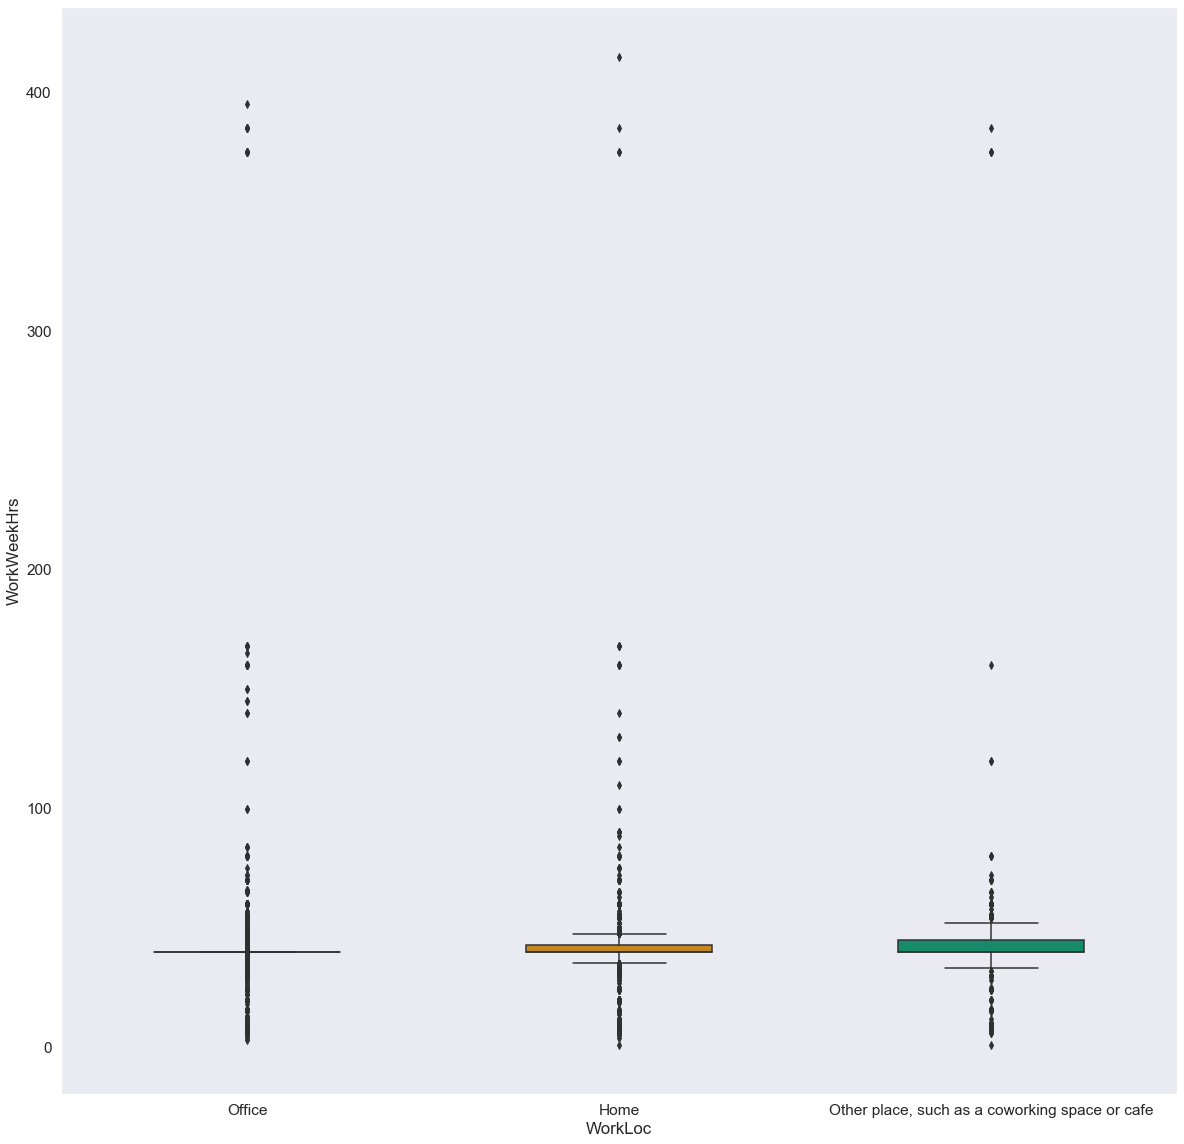

In [391]:
plt.figure(figsize=(20, 20))
sns.boxplot(x='WorkLoc', y='WorkWeekHrs', data=data, width=0.5, palette="colorblind")

[Text(0.5, 0, 'Genders')]

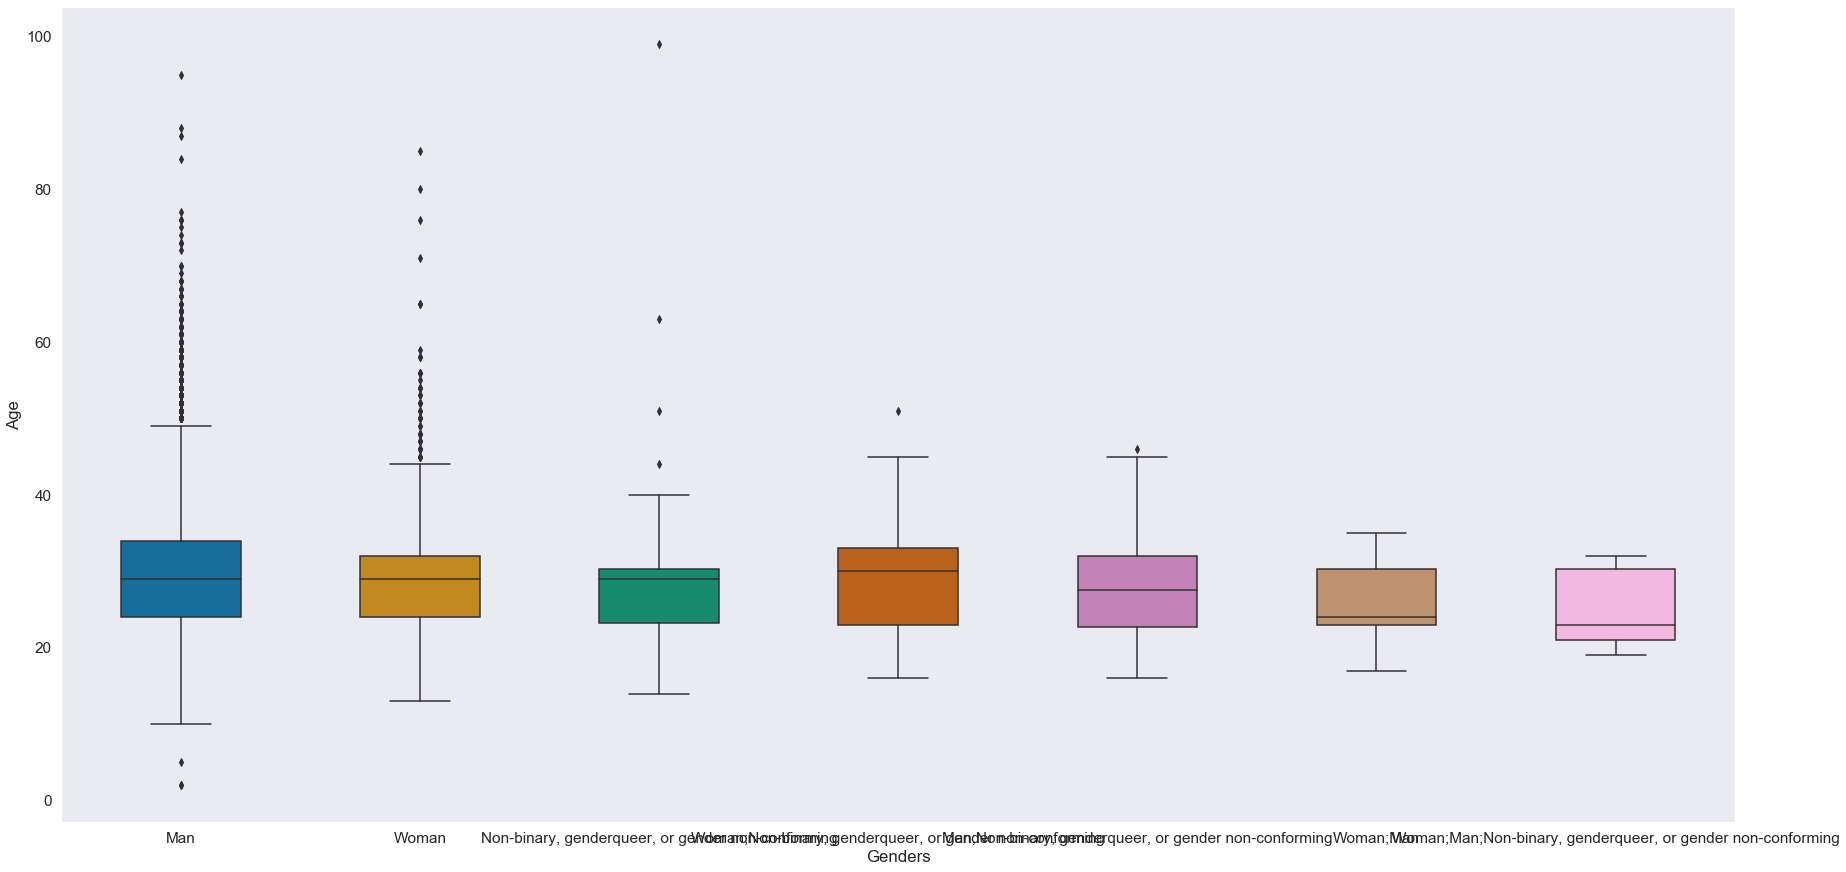

In [392]:
plt.figure(figsize=(30, 15))
a=sns.boxplot(x='Gender', y='Age', data=data, width=0.5, palette="colorblind")
a.set(xlabel='Genders')

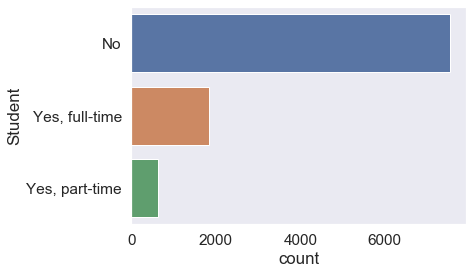

In [393]:
sns.countplot(y="Student",data=data)

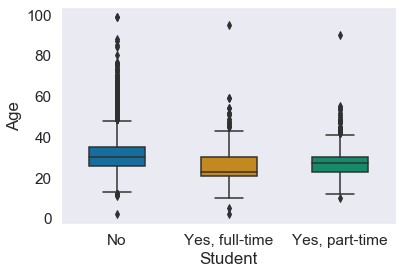

In [394]:
a=sns.boxplot(x='Student', y='Age', data=data, width=0.5, palette="colorblind")

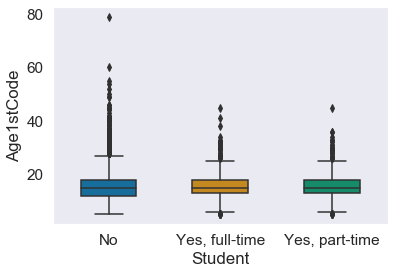

In [395]:
a=sns.boxplot(x='Student', y='Age1stCode', data=data, width=0.5, palette="colorblind")

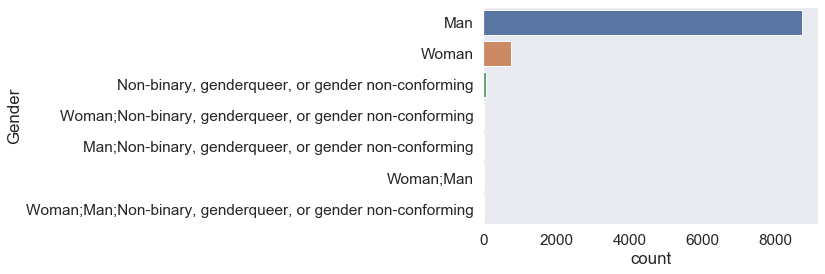

In [396]:
sns.countplot(y="Gender",data=data)

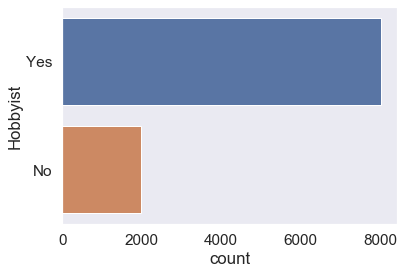

In [397]:
sns.countplot(y="Hobbyist",data=data)

In [398]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [399]:
y=['YearsCode','Age1stCode','Age','WorkWeekHrs']
data_numeric=data[y]

In [400]:
data_numeric

,YearsCode,Age1stCode,Age,WorkWeekHrs
9030,32.000000,15.0,36.000000,45.0
45932,2.000000,18.0,21.000000,40.0
81406,3.000000,17.0,25.000000,40.0
47952,11.789195,15.0,21.000000,40.0
51050,13.000000,21.0,33.000000,40.0
...,...,...,...,...
8598,5.000000,20.0,30.336699,40.0
65136,35.000000,12.0,47.000000,45.0
21120,12.000000,11.0,28.000000,40.0
49814,11.000000,20.0,31.000000,40.0


In [401]:
print(data_numeric.sample())
#to see how a random row looks before any normalization method is applied

      YearsCode  Age1stCode   Age  WorkWeekHrs
5300       14.0        13.0  28.0         40.0


In [402]:

#A look at the data value of a random sample before any normalization method is applied
#We will look at 2 methods 
#1. MinMaxMethod
#2. Normalisation using mean and std


In [403]:
min_max= MinMaxScaler()
df_min_max=min_max.fit_transform(data_numeric)

In [404]:
df_min_max

array([[0.64583333, 0.13513514, 0.35051546, 0.10628019],
       [0.02083333, 0.17567568, 0.19587629, 0.0942029 ],
       [0.04166667, 0.16216216, 0.2371134 , 0.0942029 ],
       ...,
       [0.22916667, 0.08108108, 0.26804124, 0.0942029 ],
       [0.20833333, 0.2027027 , 0.29896907, 0.0942029 ],
       [0.0625    , 0.21621622, 0.27835052, 0.0942029 ]])

In [405]:
df_min_max[0]
#It can be observed that the values look much more normalised than the previous data

array([0.64583333, 0.13513514, 0.35051546, 0.10628019])

In [406]:
std=StandardScaler()
df_std=std.fit_transform(data_numeric)

In [407]:
df_std

array([[ 2.29289365, -0.09473082,  0.6587241 ,  0.18808348],
       [-1.09801967,  0.51381836, -1.06635333, -0.07823831],
       [-0.98498922,  0.31096863, -0.60633268, -0.07823831],
       ...,
       [ 0.03228477, -0.90612973, -0.26131719, -0.07823831],
       [-0.08074567,  0.91951781,  0.08369829, -0.07823831],
       [-0.87195878,  1.12236753, -0.14631203, -0.07823831]])

In [408]:
df_std_age=df_std[:,2] #slicing numpy array
df_std_yearscode=df_std[:,0]
df_std_age1stcode=df_std[:,1]
df_std_wwhrs=df_std[:,2]


df_minmax_age=df_min_max[:,2] #slicing numpy array
df_minmax_yearscode=df_min_max[:,0]
df_minmax_age1stcode=df_min_max[:,1]
df_minmax_wwhrs=df_min_max[:,2]



In [409]:

#The dataset looks normalised 
#Hence our regression models and other visulizations can be made effectively


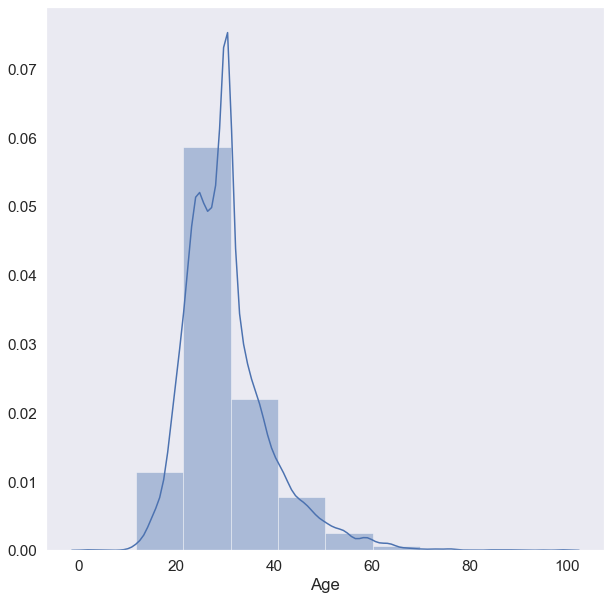

In [410]:
plt.figure(figsize=(10, 10))
sns.distplot(data_numeric['Age'],bins=10)
plt.show()
#dataset before normalization for age

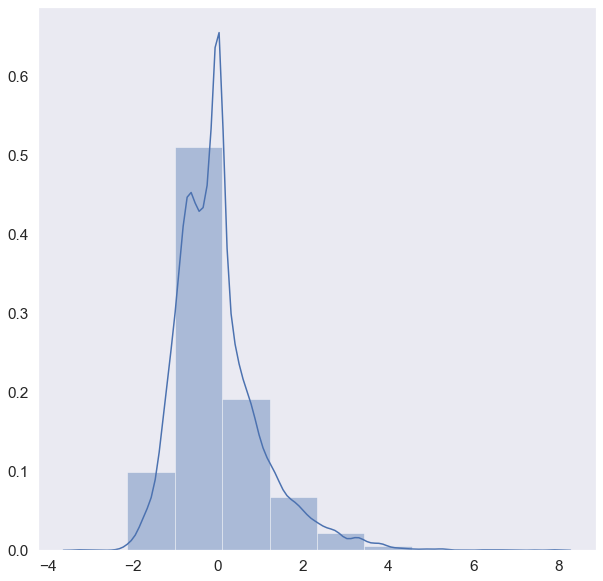

In [411]:
plt.figure(figsize=(10, 10))
sns.distplot(df_std_age,bins=10)
plt.show()
#plot after normalization


In [412]:
#other standarised plots


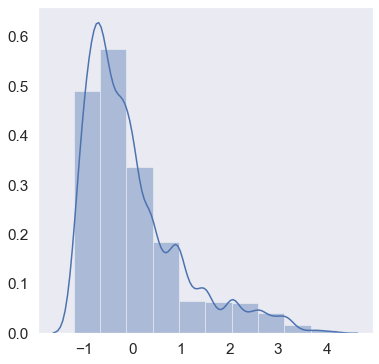

In [413]:
plt.figure(figsize=(6, 6))
sns.distplot(df_std_yearscode,bins=10)
plt.show()

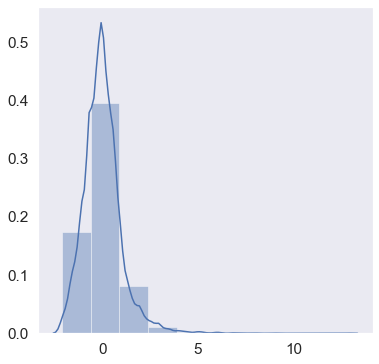

In [414]:
plt.figure(figsize=(6, 6))
sns.distplot(df_std_age1stcode,bins=10)
plt.show()

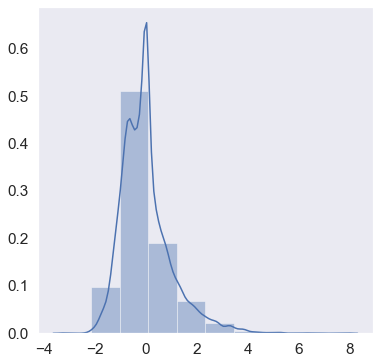

In [415]:
plt.figure(figsize=(6, 6))
sns.distplot(df_std_wwhrs,bins=10)
plt.show()

In [416]:
#to compare difference in normalized curve vs min max curves

In [417]:
#all the min_max curves


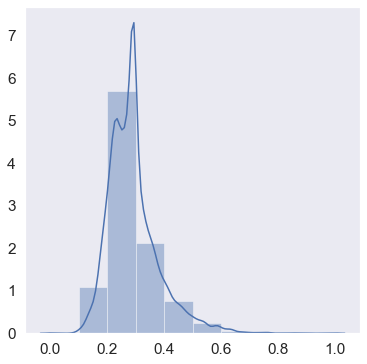

In [418]:
plt.figure(figsize=(6, 6))
sns.distplot(df_minmax_wwhrs,bins=10)
plt.show()

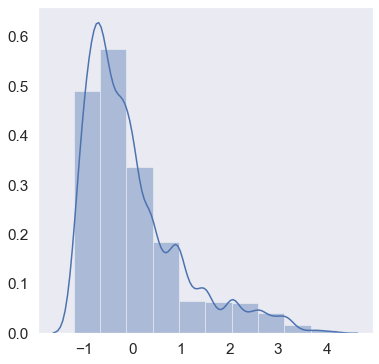

In [419]:
plt.figure(figsize=(6, 6))
sns.distplot(df_std_yearscode,bins=10)
plt.show()

In [420]:
#both the methods give the simliar desireable output

In [421]:

#TO Find Correlations in the given dataset"""
import pingouin as pg


In [422]:
pg.corr(x=data_numeric['YearsCode'], y=data_numeric['Age'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10000,0.711,"[0.7, 0.72]",0.505,0.505,0.0,inf,1.0


In [423]:
pg.corr(x=data_numeric['YearsCode'], y=data_numeric['WorkWeekHrs'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10000,0.045,"[0.03, 0.07]",0.002,0.002,0.000005,389.14,0.995


In [424]:
pg.corr(x=data_numeric['WorkWeekHrs'], y=data_numeric['Age'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10000,0.028,"[0.01, 0.05]",0.001,0.001,0.004464,0.713,0.812


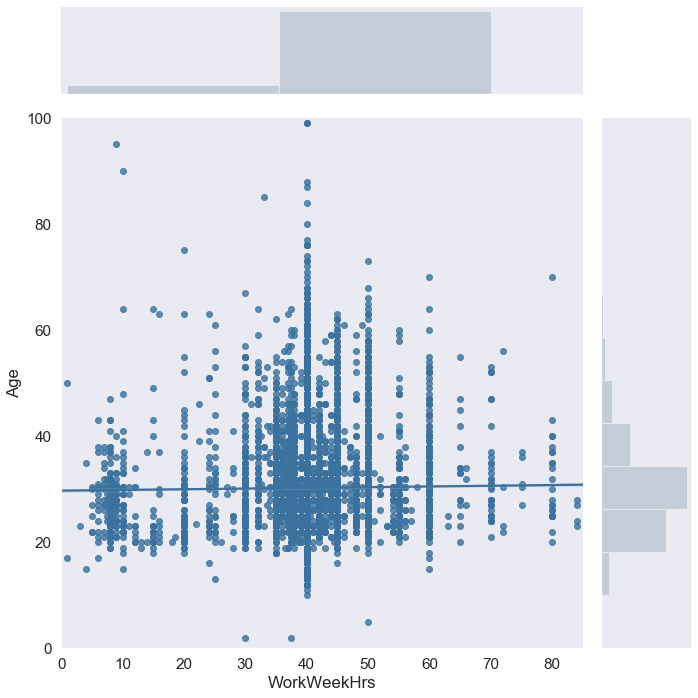

In [425]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='dark', font_scale=1.4)
g = sns.JointGrid(data=data_numeric, x='WorkWeekHrs', y='Age', xlim=(0, 85), ylim=(0, 100), height=10)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")

plt.tight_layout()

In [426]:
pg.pairwise_corr(data_numeric).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
1,YearsCode,Age,10000,0.711,0.000000e+00
0,YearsCode,Age1stCode,10000,-0.244,8.209100e-136
3,Age1stCode,Age,10000,0.118,1.346556e-32
2,YearsCode,WorkWeekHrs,10000,0.045,5.400324e-06
5,Age,WorkWeekHrs,10000,0.028,4.464167e-03
4,Age1stCode,WorkWeekHrs,10000,-0.020,4.971104e-02


In [427]:
# Using the non-parametric Spearman correlation
corrs = pg.pairwise_corr(data_numeric, columns=['YearsCode','Age1stCode','Age','WorkWeekHrs'], method='spearman')
corrs.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
1,YearsCode,Age,10000,0.648,0.000000e+00
0,YearsCode,Age1stCode,10000,-0.303,7.560940e-212
5,Age,WorkWeekHrs,10000,0.052,2.511695e-07
2,YearsCode,WorkWeekHrs,10000,0.050,4.759916e-07
4,Age1stCode,WorkWeekHrs,10000,0.026,8.234620e-03


In [428]:
"""
Correlation of all numeric parameters Vs Age"""
corrs = pg.pairwise_corr(data_numeric, columns=[['Age'], ['YearsCode','Age1stCode','Age','WorkWeekHrs']])
corrs.sort_values(by=['p-unc'])[['X', 'Y', 'r', 'p-unc']].head()

D:\python\lib\site-packages\pingouin\pairwise.py:1016: RuntimeWarning: divide by zero encountered in arctanh
  stats['z'] = np.round(np.arctanh(stats['r'].values), 3)


,X,Y,r,p-unc
0,Age,YearsCode,0.711,0.000000e+00
2,Age,Age,1.000,0.000000e+00
1,Age,Age1stCode,0.118,1.346556e-32
3,Age,WorkWeekHrs,0.028,4.464167e-03


In [429]:
"""Correlation of all numeric parameters Vs Hours spent per week coding"""
corrs = pg.pairwise_corr(data_numeric, columns=[['WorkWeekHrs'], ['YearsCode','Age1stCode','Age','WorkWeekHrs']])
corrs.sort_values(by=['p-unc'])[['X', 'Y', 'r', 'p-unc']].head()

D:\python\lib\site-packages\pingouin\pairwise.py:1016: RuntimeWarning: divide by zero encountered in arctanh
  stats['z'] = np.round(np.arctanh(stats['r'].values), 3)


,X,Y,r,p-unc
3,WorkWeekHrs,WorkWeekHrs,1.000,0.000000
0,WorkWeekHrs,YearsCode,0.045,0.000005
2,WorkWeekHrs,Age,0.028,0.004464
1,WorkWeekHrs,Age1stCode,-0.020,0.049711


In [430]:
data.corr()

,YearsCode,Age1stCode,Age,WorkWeekHrs
YearsCode,1.000000,-0.244299,0.710597,0.045468
Age1stCode,-0.244299,1.000000,0.118488,-0.019625
Age,0.710597,0.118488,1.000000,0.028431
WorkWeekHrs,0.045468,-0.019625,0.028431,1.000000


In [431]:
data.corr().round(3)

,YearsCode,Age1stCode,Age,WorkWeekHrs
YearsCode,1.000,-0.244,0.711,0.045
Age1stCode,-0.244,1.000,0.118,-0.020
Age,0.711,0.118,1.000,0.028
WorkWeekHrs,0.045,-0.020,0.028,1.000


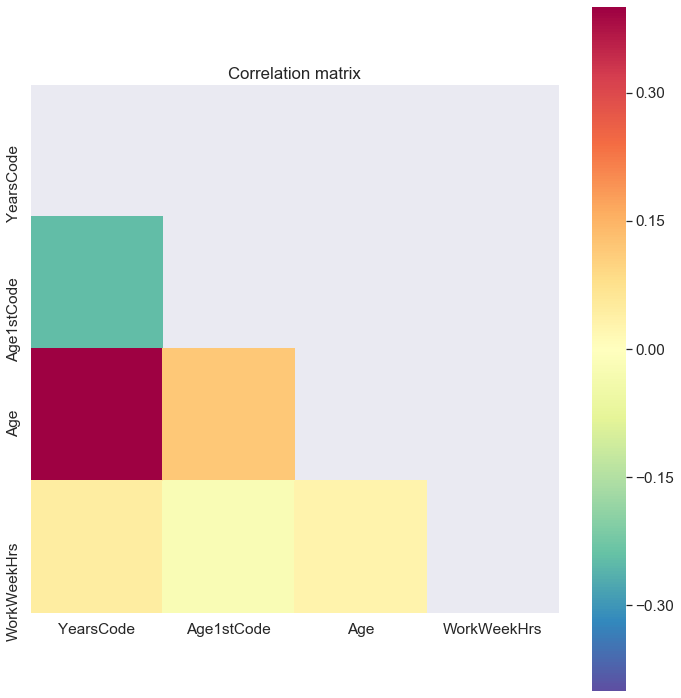

In [432]:
plt.figure(figsize=(10, 10))
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')
plt.tight_layout()

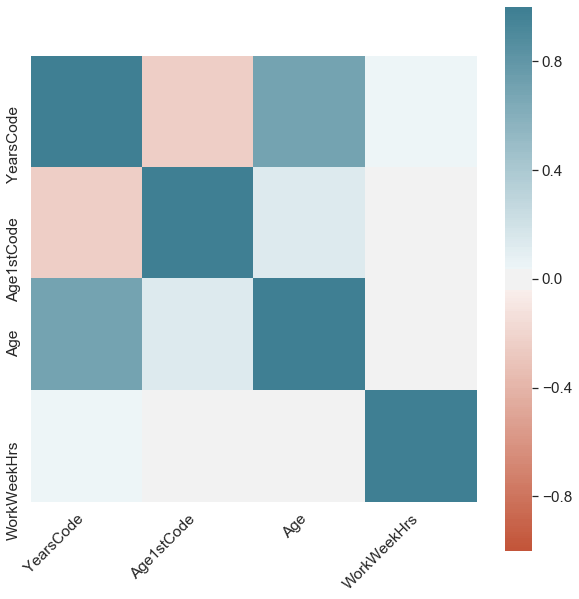

In [433]:
plt.figure(figsize=(10, 10))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [434]:
#to test Hypothesis on Average Age of Coder

In [435]:
from scipy.stats import norm
from math import sqrt

def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        count =1
        return count
    else:
        count=0
        return count

alpha = 0.05 #interval size
sample_mean = data['Age'].mean()
pop_mean = avg_age
sample_size =  10000
std_dev = 8.852144

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 30.33669864915956
H1 : μ > 30.33669864915956
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -0.728379635936397 

Failed to reject NULL hypothesis


In [436]:
#Hence for our sample we can conclude that sample age lies in the CI for population mean


#Now to test hypothesis on Average hours worked in a week

In [437]:
from scipy.stats import norm
from math import sqrt

def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        count =1
        return count
    else:
        count=0
        return count

alpha = 0.05 #interval size
sample_mean = data['WorkWeekHrs'].mean()
pop_mean = avg_WorkWeekHrs
sample_size =  10000
std_dev = 18.832187

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 41.54372168474286
H1 : μ > 41.54372168474286
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -0.3974773840280354 

Failed to reject NULL hypothesis


In [438]:
#Now for 10% CI

In [439]:
from scipy.stats import norm
from math import sqrt

def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        count =1
        return count
    else:
        count=0
        return count

alpha = 0.1 #interval size
sample_mean = data['WorkWeekHrs'].mean()
pop_mean = avg_WorkWeekHrs
sample_size =  10000
std_dev = 18.832187

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 41.54372168474286
H1 : μ > 41.54372168474286
alpha value is : 0.1 

actual z value : 1.2815515655446004
hypothesis z value : -0.3974773840280354 

Failed to reject NULL hypothesis


In [440]:
#The result stays the same
#
#to test Years Coded by a developer

In [441]:
from scipy.stats import norm
from math import sqrt

def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        count =1
        return count
    else:
        count=0
        return count

alpha = 0.05 #interval size
sample_mean = data['YearsCode'].mean()
pop_mean = 11.874345 # values obtained from describe function()
sample_size =  10000
std_dev = 8.997534

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 11.874345
H1 : μ > 11.874345
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -1.7779761693965679 

Failed to reject NULL hypothesis


In [442]:
#all the hypothesis tested ar on par with the population statistics
#hence they cannot be rejected

In [443]:
"""

Some regression testing


"""

'\n\nSome regression testing\n\n\n'

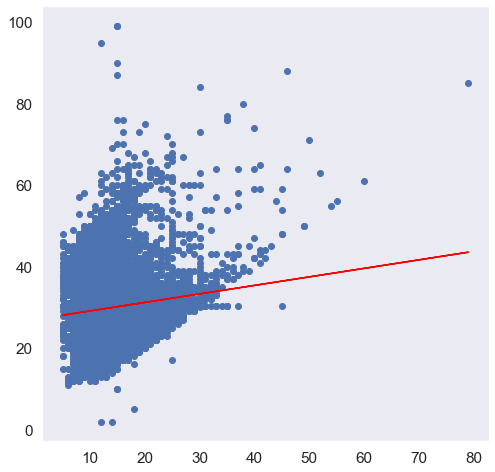

In [444]:
# for age and age1stcode
from sklearn.linear_model import LinearRegression
X = data_numeric.iloc[:, 1].values.reshape(-1, 1)  #transposes the nmupy array to a linear array
Y = data_numeric.iloc[:,2].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

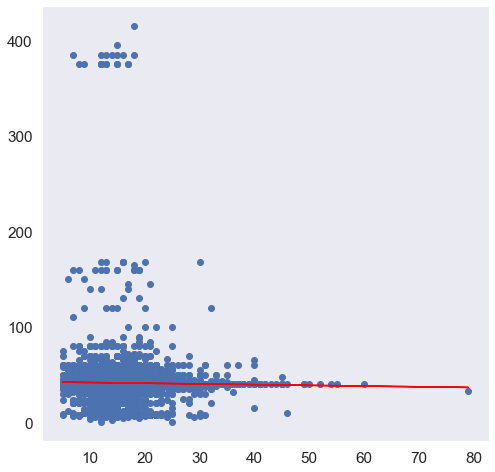

In [445]:
#for  age1stcode , age
from sklearn.linear_model import LinearRegression
X = data_numeric.iloc[:, 1].values.reshape(-1, 1)  #transposes the nmupy array to a linear array
Y = data_numeric.iloc[:,3].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

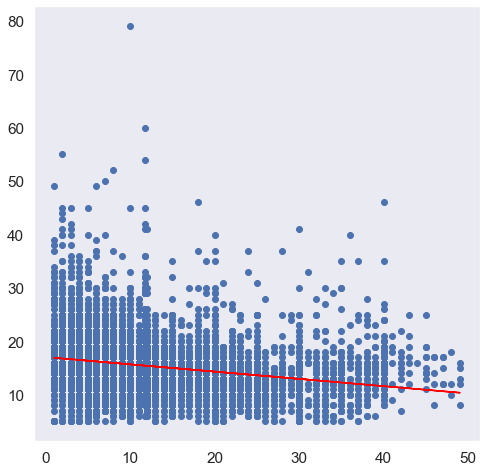

In [446]:
#for  age1stcode : yearscoded
from sklearn.linear_model import LinearRegression
X = data_numeric.iloc[:, 0].values.reshape(-1, 1)  #transposes the nmupy array to a linear array
Y = data_numeric.iloc[:,1].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

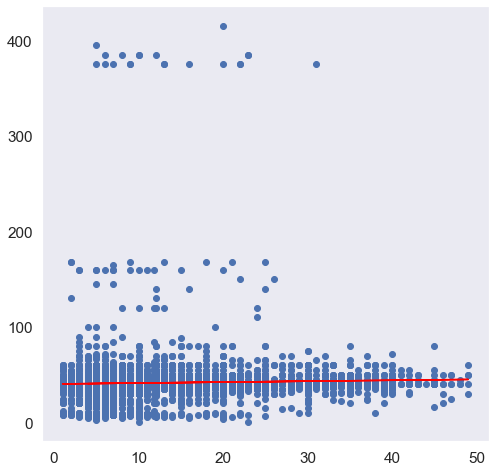

In [447]:
#for years code vs yearscode , wwhrs
from sklearn.linear_model import LinearRegression
X = data_numeric.iloc[:, 0].values.reshape(-1, 1)  #transposes the nmupy array to a linear array
Y = data_numeric.iloc[:,3].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

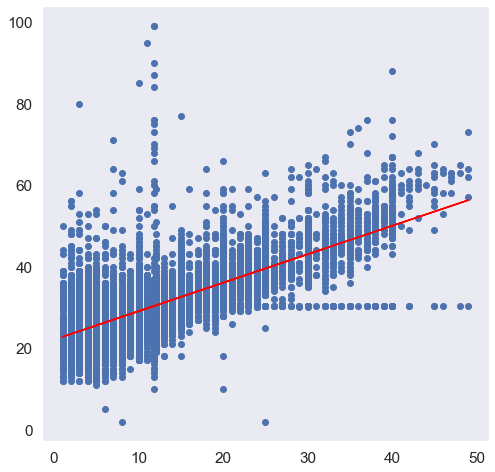

In [448]:
#for years code vs ,age
from sklearn.linear_model import LinearRegression
X = data_numeric.iloc[:, 0].values.reshape(-1, 1)  #transposes the nmupy array to a linear array
Y = data_numeric.iloc[:,2].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

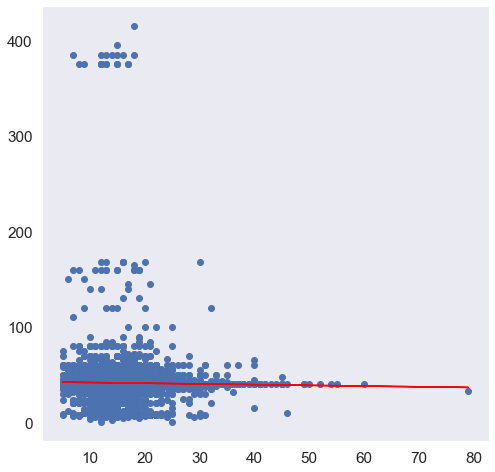

In [449]:
#for age vs wwhrs
from sklearn.linear_model import LinearRegression
X = data_numeric.iloc[:, 1].values.reshape(-1, 1)  #transposes the nmupy array to a linear array
Y = data_numeric.iloc[:,3].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()